# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
combined_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice_count = len(combined_df['Mouse ID'].unique())
mice_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_rows = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'], keep = False)]
duplicated_rows['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data=combined_df.loc[combined_df['Mouse ID'] == 'g989']
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_df.drop(combined_df[combined_df['Mouse ID'] == 'g989'].index)
clean_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_count = len(clean_data['Mouse ID'].unique())
clean_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_group = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean("Tumor Volume (mm3)")
median_group = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median("Tumor Volume (mm3)")
drug_group = pd.merge(mean_group,median_group, on="Drug Regimen", how='left')
drug_group = drug_group.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume","Tumor Volume (mm3)_y":"Median Tumor Volume"})
variance_group = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_group = pd.merge(drug_group,variance_group, on="Drug Regimen", how='left')
stddev_group = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_group = pd.merge(drug_group,stddev_group, on="Drug Regimen", how='left')
drug_group = drug_group.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Variance", "Tumor Volume (mm3)_y":"Tumor Volume Std. Dev."})
stderr_group = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
drug_group = pd.merge(drug_group,stderr_group, on="Drug Regimen", how='left')
drug_group = drug_group.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."})
drug_group

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_group = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
aggregate_group.style.set_caption("Tumor Volume (mm3)")

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

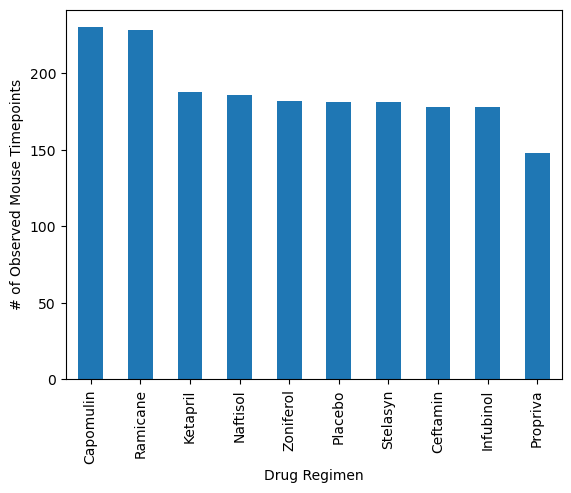

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_per_regimen = clean_data.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
bar_chart = mouse_per_regimen.plot(kind='bar',xlabel='Drug Regimen',ylabel='# of Observed Mouse Timepoints')

<BarContainer object of 10 artists>

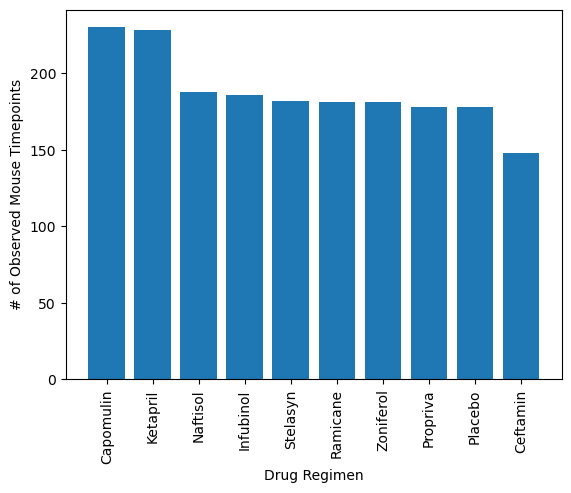

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_list = mouse_per_regimen.tolist()
drugs_list = clean_data['Drug Regimen'].unique().tolist()
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.bar(drugs_list, mouse_list)

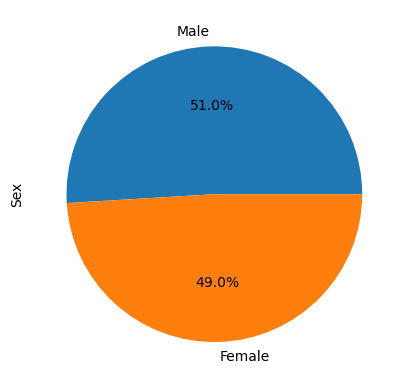

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_data.groupby('Sex')['Sex'].count().sort_values(ascending=False)
pie_chart = mouse_sex.plot(kind='pie',autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x12e915e20>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

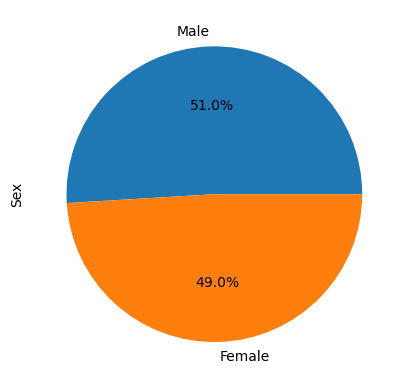

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = mouse_sex.to_list()
sex_list = ['Male','Female']
plt.ylabel('Sex')
plt.pie(sex_count, labels=sex_list, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [76]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
idx = clean_data.groupby('Mouse ID')['Timepoint'].idxmax()
last_timpoint = clean_data.loc[idx]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#By using an already merged dataframe, it is not needed to merge again. It is the same data
last_timpoint[['Mouse ID','Tumor Volume (mm3)']].head(5)

,Mouse ID,Tumor Volume (mm3)
1804,a203,67.973419
1786,a251,65.525743
1783,a262,70.717621
1856,a275,62.999356
1401,a366,63.440686


In [308]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
print(f'List of treatments {treatment_list}')

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
print(f'Empty list to fill with tumor vol data {tumor_vol_list}')

#Capomulin
capo_mices = clean_data.drop(clean_data[clean_data['Drug Regimen'] != 'Capomulin'].index)
capo_volumes = capo_mices['Tumor Volume (mm3)']
capo_quartiles = capo_volumes.quantile([.25,.5,.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq - capo_lowerq
capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)
capo_count = 0
for i in capo_mices.itertuples():
    if i._3 < capo_lower_bound or i._3 > capo_upper_bound:
        capo_count+=1
if capo_count > 0: print(f'Capomulin regimen has {capo_count} outliers')
else: print('Capomulin has no outliers')

#Infubinol
infu_mices = clean_data.drop(clean_data[clean_data['Drug Regimen'] != 'Infubinol'].index)
infu_volumes = infu_mices['Tumor Volume (mm3)']
infu_quartiles = infu_volumes.quantile([.25,.5,.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq - infu_lowerq
infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)
infu_count = 0
for i in infu_mices.itertuples():
    if i._3 < infu_lower_bound or i._3 > infu_upper_bound:
        infu_count+=1
if infu_count > 0: print(f'Infubinol regimen has {infu_count} outliers')
else: print('Infubinol has no outliers')

#Ramicane
rami_mices = clean_data.drop(clean_data[clean_data['Drug Regimen'] != 'Ramicane'].index)
rami_volumes = rami_mices['Tumor Volume (mm3)']
rami_quartiles = rami_volumes.quantile([.25,.5,.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq - rami_lowerq
rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)
rami_count = 0
for i in rami_mices.itertuples():
    if i._3 < rami_lower_bound or i._3 > rami_upper_bound:
        rami_count+=1
if rami_count > 0: print(f'Ramicane regimen has {rami_count} outliers')
else: print('Ramicane has no outliers')

#Ceftamin
ceft_mices = clean_data.drop(clean_data[clean_data['Drug Regimen'] != 'Ceftamin'].index)
ceft_volumes = ceft_mices['Tumor Volume (mm3)']
ceft_quartiles = ceft_volumes.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
ceft_count = 0
for i in ceft_mices.itertuples():
    if i._3 < ceft_lower_bound or i._3 > ceft_upper_bound:
        ceft_count+=1
if ceft_count > 0: print(f'Ceftamin regimen has {ceft_count} outliers')
else: print('Ceftamin has no outliers')

List of treatments ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Empty list to fill with tumor vol data []
Capomulin regimen has 2 outliers
Ketapril has no outliers
Naftisol has no outliers
Infubinol has no outliers
Stelasyn regimen has 1 outliers
Ramicane regimen has 1 outliers
Zoniferol has no outliers
Propriva regimen has 2 outliers
Placebo has no outliers
Ceftamin has no outliers


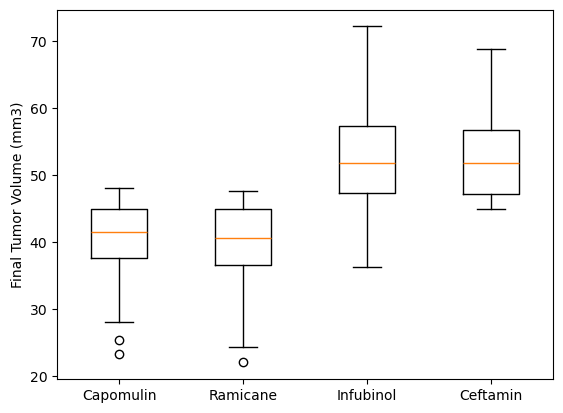

In [160]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
labels = ['Capomulin','Ramicane','Infubinol','Ceftamin']
plt.boxplot([capo_volumes, rami_volumes, infu_volumes, ceft_volumes],labels=labels)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

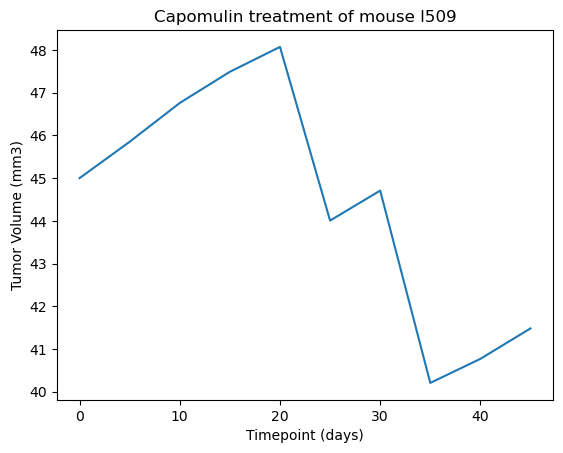

In [165]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
graph_mouse_over_time = combined_df.drop(combined_df[combined_df['Mouse ID'] != 'l509'].index)
graph_timepoint = graph_mouse_over_time['Timepoint']
graph_tumor_vol = graph_mouse_over_time['Tumor Volume (mm3)']
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(graph_timepoint,graph_tumor_vol)

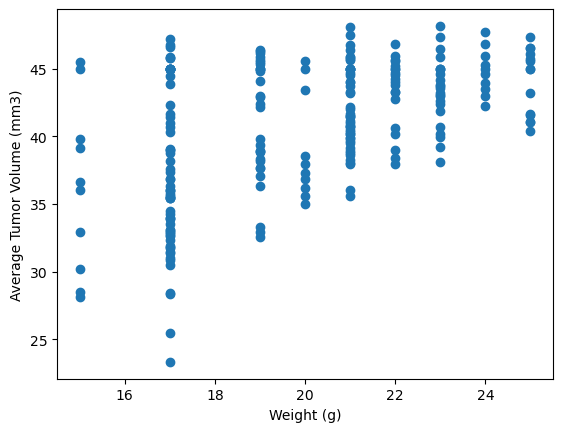

In [287]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = combined_df.drop(combined_df[combined_df['Drug Regimen'] != 'Capomulin'].index)
weight_capo = capomulin_mice['Weight (g)']
vol_capo = capomulin_mice['Tumor Volume (mm3)']
plt.scatter(weight_capo, vol_capo)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.5256995552077168


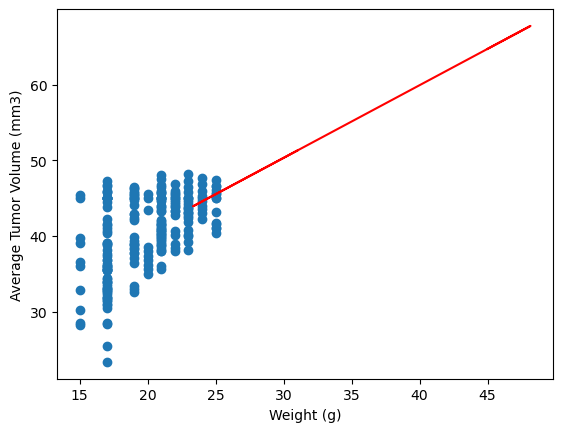

In [313]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation, _ = st.pearsonr(vol_capo, weight_capo)
print(f'The correlation between mouse weight and the average tumor volume is {correlation}')

slope, intercept, r_value, p_value, std_err = st.linregress(weight_capo, vol_capo)

regresion_values = vol_capo * slope + intercept

plt.scatter(weight_capo, vol_capo)
plt.plot(vol_capo, regresion_values, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()